# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [ ]:
"""
final accuracy and thanks for support. 
thanks for mentor's suggestions during review memo
and also thanks for these following colleagues blogs and contributions 


The accuracy for test data set is 95.2%
The accuracy for new images (5) is 20%
CNN model is based on LeNet-5 model with improved parameters. 


Vivek Yadav     
https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc#.zhltxi6xv

Param Aggarwal 
https://medium.com/@paramaggarwal/intricacies-of-traffic-sign-classification-with-tensorflow-8f994b1c8ba#.tcmywr4cd

Alex Staravoitau
http://navoshta.com/traffic-signs-classification/

"""

In [1]:
# Importing some useful packages
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import cv2
import random
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import shuffle
from sklearn import preprocessing 
import pandas as pd
%matplotlib inline
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import os
import skimage.data
import skimage.transform
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
from skimage import color
import scipy.ndimage
import time as time

# Load pickled data
# Visualizations will be shown in the notebook.
# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#X_train, y_train = train['features'], train['labels']
X, y = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

### using stratigiedshufflesplit to generate train and validate dataset
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.01, random_state=0)
for train_index, validation_index in sss.split(X, y):
    X_train, X_validation = X[train_index], X[validation_index]
    y_train, y_validation = y[train_index], y[validation_index]

# Random method to get validation data
#sample_indexes = random.sample(range(len(X_train)), 10)
#X_validation = [X_train[i] for i in sample_indexes]
#y_validation = [y_train[i] for i in sample_indexes]

print(X_train.shape)
print(y_train.shape)
#print(len(X_test))
#print(len(X_validation))

### test area below


(38816, 32, 32, 3)
(38816,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = ", len(X_validation))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 38816
Number of testing examples = 12630
Number of validation examples =  393
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

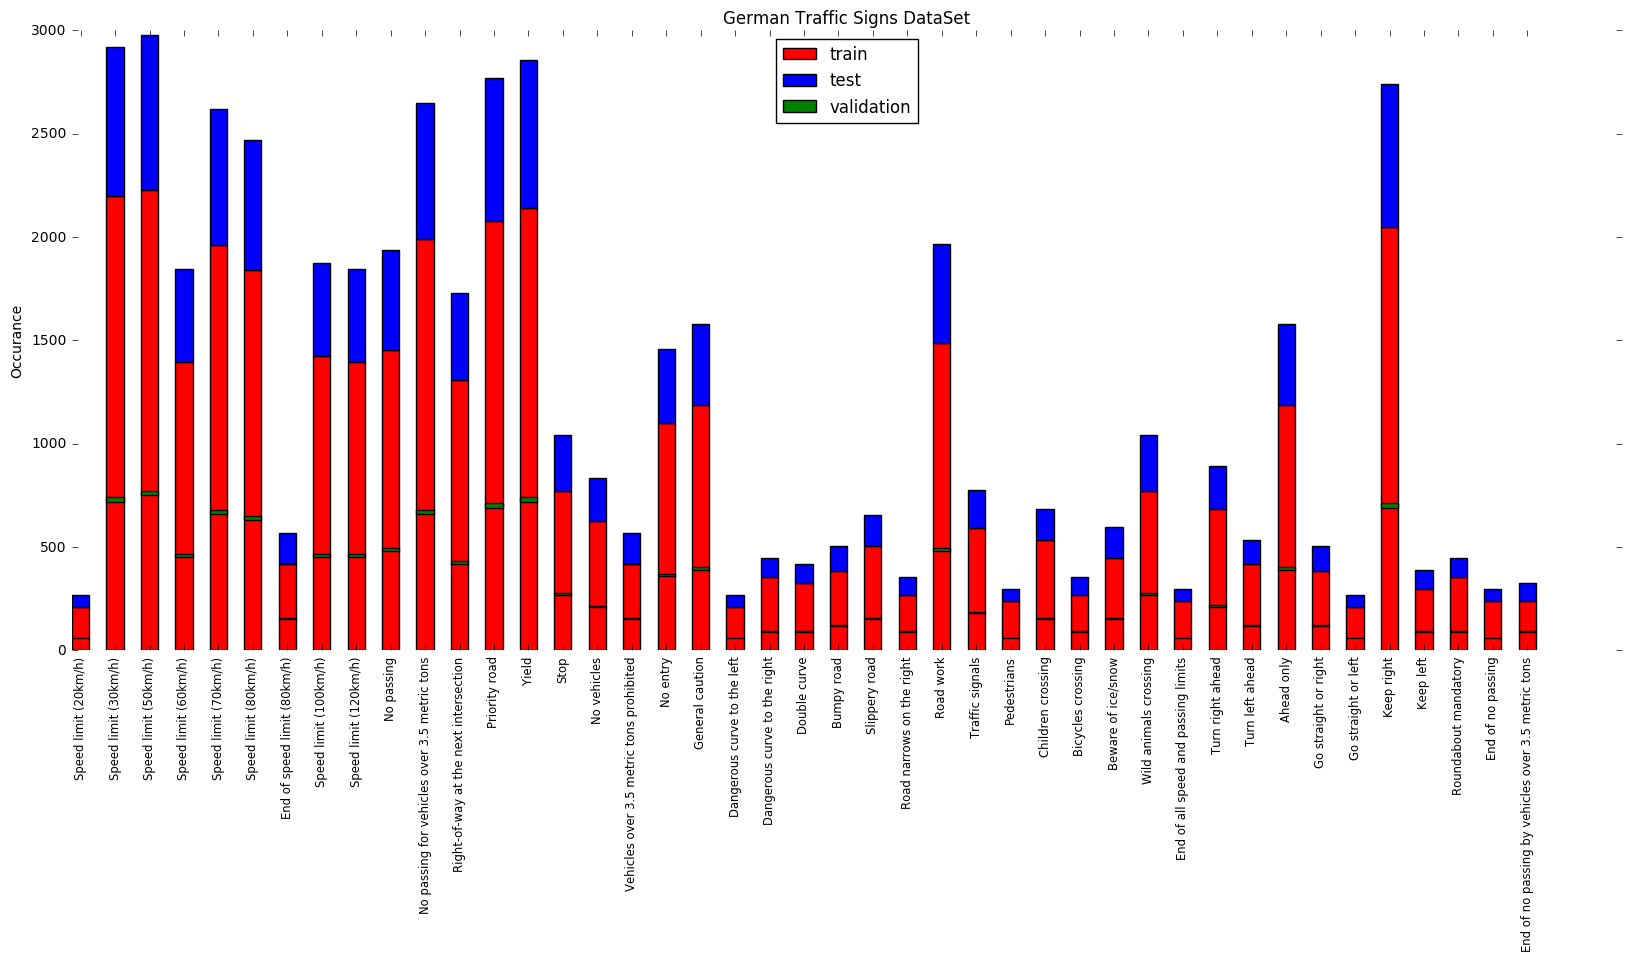

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

### Random 10 sample exploration
#sample_indexes = random.sample(range(len(X_train)), 10)
#for index in sample_indexes:
#    image = X_train[index].squeeze()
#    plt.figure(figsize=(1,1))
#    plt.imshow(image, cmap="gray")
#    print(y_train[index])

### Add the histograms showing the number of images for each of the class labels
data_i_train = [sum(y_train == i) for i in range(len(np.unique(y_train)))]
data_i_test = [sum(y_test == i) for i in range(len(np.unique(y_test)))]
data_i_validation = [sum(y_validation == i) for i in range(len(np.unique(y_validation)))]

data_pd = pd.read_csv('signnames.csv')
#print(data_pd['SignName'].values)

ind = np.arange(n_classes)
width = 0.5
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1, frameon=False)
p1 = plt.bar(ind, data_i_train, width, color = 'r')
p2 = plt.bar(ind, data_i_test, width, color = 'b', bottom = data_i_train)
p3 = plt.bar(ind, data_i_validation, width, color = 'g', bottom = data_i_test)
plt.ylabel('Occurance')
plt.title('German Traffic Signs DataSet')
plt.xticks(ind+width/2., ind, size='small', rotation = 30)
#ax.set_xticks(ind)
ax.set_xticklabels(data_pd['SignName'].values, rotation = 90)
plt.yticks(np.arange(0, 3001, 500))
plt.legend((p1[0], p2[0], p3[0]), ('train', 'test', 'validation'), loc = 'upper center', frameon = 'true')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

before processed


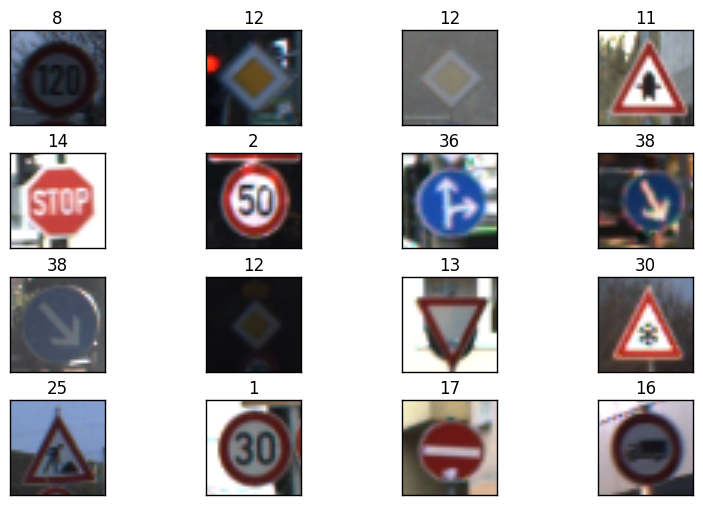

after processed


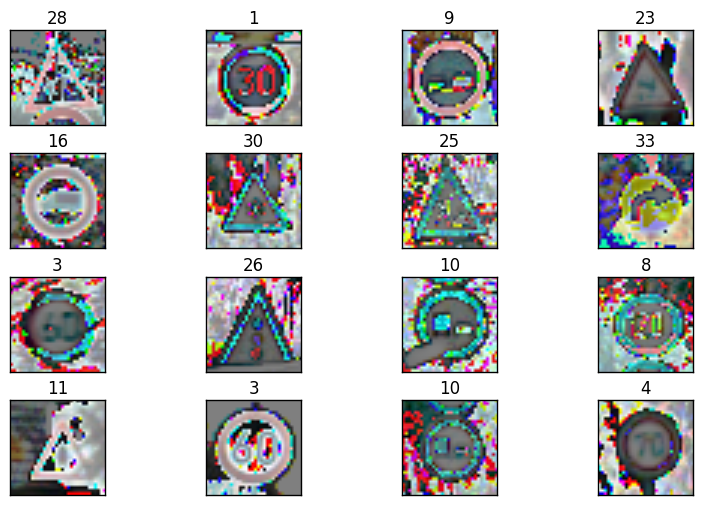

'\n### Data Augmentation\ndef gen_images(image):\n    shear_range = random.randrange(-10, 10)\n    image = scipy.ndimage.interpolation.shift(image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])\n    image = scipy.ndimage.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)\n    \n    image = p_transform(image, 0.75)\n    \n    #Brightness augmentation\n    image = brightness_images(image)\n    #image = image*255 + 0.5\n    \n    return image\n\n### confirm augmentation fuctions work\nplt.figure(figsize = (1,1))\nimg = X_test[0]\nplt.imshow(img)\nplt.show()\nplt.figure(figsize = (1,1))\n#img_p = gen_images(img)\n#img_p = his_process_image(img)\nimg_p = p_transform(img, 0.75)\nprint(img_p.shape,img_p.max(),img_p.min())\nprint(img_p)\n#img_p = brightness_images(img)\nplt.imshow(img_p)\nplt.show()\n\n\ndata_i_train = [sum(y_train == i) for i in range(len(np.unique(y_train)))]\nprint("before augmentation", data_i_train)\n\nfor i in range(len(data_i_train)):\n    pr

In [4]:
### Preprocess the data here.
image_size = 32

### rgb2gray function
### transform image from 3 to 1 channel 
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

### These two below fuction are to show images
### def show_image_r()   to rndom show 4x4 images
### def show_image()     to show all images

### The fuction idea is from: 
### http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
### https://github.com/vxy10/ImageAugmentation
### random show 4x4 images 
def show_image_r_4x4(X, y):
  
    fig, axes = plt.subplots(4, 4, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.05)

    for i in range(4):
        for j in range(4):
            i_plot = np.random.randint(1,len(y))
            axes[i,j].imshow(X[i_plot])
            axes[i,j].set_title(y[i_plot])

    plt.show()
    
### histogram equalization and normaralization 
def his_process_image(image):

    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    
    return image

def input_process(x):
    out_image = []
    for index in range(len(x)):
        
        ### only for 1 channel fit for LeNet-5 model directly 
        #gray = rgb2gray(x[index])
        #out_image.append(gray.reshape(-1,image_size,1))
        
        ### histogram equalization
        im32 = his_process_image(x[index])
        
        ### using resize to do normalization 
        ### nomoralization 
        ### ingnored because histogram equlization covered normaralization already 
        #im32 = skimage.transform.resize(im32, (32,32))
        out_image.append(im32.reshape(-1,image_size,3))
        
    return out_image

print("before processed")
show_image_r_4x4(X,y)

### input process train, test and validation data set
X_train = input_process(X_train)
X_test = input_process(X_test)
X_validation = input_process(X_validation)

print("after processed")
show_image_r_4x4(X_train,y_train)

def brightness_images(im):
    factor = 1 + np.random.uniform()
    #factor = 1.4
    im[:,:,0] = im[:,:,0]*factor
    im[:,:,1] = im[:,:,1]*factor
    im[:,:,2] = im[:,:,2]*factor
    return im

"""
to change image angle

The fuction method is from Alex Staravoitau
http://navoshta.com/traffic-signs-classification/
"""
### image shear or projection
def p_transform(X, f):
    image_size = 32
    d = image_size *0.3 *f
    tl_top = random.uniform(-d, d)     # Top left corner, top margin
    tl_left = random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = random.uniform(-d, d)     # Top right corner, top margin
    tr_right = random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = random.uniform(-d, d)   # Bottom right corner, right margin

    transform = ProjectiveTransform()
    transform.estimate(np.array((
            (tl_left, tl_top),
            (bl_left, image_size - bl_bottom),
            (image_size - br_right, image_size - br_bottom),
            (image_size - tr_right, tr_top)
        )), np.array((
            (0, 0),
            (0, image_size),
            (image_size, image_size),
            (image_size, 0)
        )))
    X = warp(X, transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

    return X

"""
### Data Augmentation
def gen_images(image):
    shear_range = random.randrange(-10, 10)
    image = scipy.ndimage.interpolation.shift(image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    image = scipy.ndimage.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)
    
    image = p_transform(image, 0.75)
    
    #Brightness augmentation
    image = brightness_images(image)
    #image = image*255 + 0.5
    
    return image

### confirm augmentation fuctions work
plt.figure(figsize = (1,1))
img = X_test[0]
plt.imshow(img)
plt.show()
plt.figure(figsize = (1,1))
#img_p = gen_images(img)
#img_p = his_process_image(img)
img_p = p_transform(img, 0.75)
print(img_p.shape,img_p.max(),img_p.min())
print(img_p)
#img_p = brightness_images(img)
plt.imshow(img_p)
plt.show()


data_i_train = [sum(y_train == i) for i in range(len(np.unique(y_train)))]
print("before augmentation", data_i_train)

for i in range(len(data_i_train)):
    print(i, ': ', end='')
    mask = np.where(y_train == i)
    #print(mask[0])
    n_sample = len(mask[0])
    if n_sample < 800:
        ind_rand = np.random.randint(0,n_sample)
        for j in range(800 - n_sample):
            new_img = gen_images(X_train[mask[0][ind_rand]])
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [i]), axis=0)
    print('')
    
data_i_train = [sum(y_train == i) for i in range(len(np.unique(y_train)))]
print("after augmentation", data_i_train)

pickle.dump( X_train, open( "X_train_aug.p", "wb" ) )
pickle.dump( y_train, open( "y_train_aug.p", "wb" ) )
"""

### random show 10 images one by one
#sample_indexes = random.sample(range(len(X_train)), 10)
#for index in sample_indexes:
#    image = X_train[index].squeeze()
#    plt.figure(figsize=(1,1))
#    plt.imshow(image, cmap="gray")
#    print(y_train[index])

In [ ]:
### load X_train, y_train after augmentation
#X_train = pickle.load( open( "X_train_aug.p", "rb" ) )
#y_train = pickle.load( open( "y_train_aug.p", "rb" ) )

In [5]:
### Setup Tensorflow
X_train, y_train = shuffle(X_train, y_train)
#EPOCHS = 5
EPOCHS = 10
#BATCH_SIZE = 200
BATCH_SIZE = 128

### Features and Lables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [6]:
### LeNet-5 model
### https://github.com/udacity/CarND-LeNet-Lab.git
def LeNet(x):    

    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # tensorboard data collection summary_image
    #tf.summary_image("conv1", conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 1024. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [7]:
### Model 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, mean=0, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def model(x):
    ## conv1 layer ##
    W_conv1 = weight_variable([5,5,3,8]) # patch 5x5, in size 3, out size 8
    b_conv1 = bias_variable([8])
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1) # output size 32x32x8

    ## conv2 layer ##
    W_conv2 = weight_variable([5,5,8,16]) # patch 5x5, in size 8, out size 16
    b_conv2 = bias_variable([16])
    h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2) # output size 32x32x16
    h_pool2 = max_pool_2x2(h_conv2) # output size 16x16x16
    #h_pool2 = tf.nn.dropout(h_pool2, keep_prob)
    
    ## conv3 layer ##
    W_conv3 = weight_variable([5,5,16, 32]) # patch 5x5, in size 16, out size 32
    b_conv3 = bias_variable([32])
    h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3) # output size 8x8x32
    h_pool3 = max_pool_2x2(h_conv3) # output size 8x8x32
    h_pool3 = tf.nn.dropout(h_pool3, keep_prob)
    
    # SOLUTION: Flatten. Input = 8x8x32. Output = 1024.
    fc0 = flatten(h_pool3)

    ## fc1 layer ##
    W_fc1 = weight_variable([8*8*32, 1024])
    b_fc1 = bias_variable([1024])
    # [n_samples, 7, 7, 64] ->> [n_samples, 8*8*64]
    #h_pool2_flat = tf.reshape(fc0, [-1, 8*8*64])
    h_fc1 = tf.nn.relu(tf.matmul(fc0, W_fc1) + b_fc1)
    h_fc1 = tf.nn.dropout(h_fc1, keep_prob)

    ## fc2 layer ##
    W_fc2 = weight_variable([1024, 43])
    b_fc2 = bias_variable([43])
    logits = tf.matmul(h_fc1, W_fc2) + b_fc2
    
    return logits 

In [8]:
### Training Pipeline
rate = 0.001
### rate 0.01 get very poor accuracy 0.059 with 5 epochs
#rate = 0.01
### using LeNet model to train 
logits = LeNet(x)
### using model built own to train
#logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
# tensorboard data collection 
cost_summary = tf.summary.scalar("loss", loss_operation)

### Model Evaluation 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#correct_prediction = tf.equal(tf.argmax(LeNet(x), 1), tf.argmax(one_hot_y, 1))
#correct_prediction = tf.equal(tf.argmax(model(x), 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# tensorboard data collection
accuracy_summary = tf.summary.scalar("accuracy", accuracy_operation)

### train saver
saver = tf.train.Saver()
save_file = "D:\\xufq\\SD\\CarND-Traffic-Sign-Classifier-Project\\model.ckpt"

# Merge all summaries to a single operator
merged = tf.summary.merge_all()
#merged = tf.summary_merge([cost_summary, accuracy_summary])

### Evaluate test and validation accuracy 
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    start_time = time.time()
    train_writer = tf.summary.FileWriter('D:\\xufq\\SD\\CarND-Traffic-Sign-Classifier-Project\\train',sess.graph)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # perform the operations we defined earlier on batch
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            # tensorboard data collection 
            #summary = sess.run(merged, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            _,summary = sess.run([training_operation,merged], feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            # write log
            train_writer.add_summary(summary, i)
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    end_time = time.time()
    time_diff = end_time-start_time
    print(time_diff)
    saver.save(sess, save_file)
    train_writer.flush()
    train_writer.close() 
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.931

EPOCH 2 ...
Validation Accuracy = 0.980

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.972

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.992

EPOCH 9 ...
Validation Accuracy = 0.990

EPOCH 10 ...
Validation Accuracy = 0.995

1264.2834222316742
Model saved


In [9]:
### Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**


In [ ]:
"""
These following main methods are applied in this model.
These preprocessings are very important for test accuracy improvement. 
1, split data into train and validation with StratifiedShuffleSplit. This is critical for unbalance situation. 
2, image histogram equalization through def his_process_image(image)
3, image normaralization 
4, input data augmentation with rotation, translation, shear and brightness 

these following proposals are ingnored in the second version:
1, rgb2gray

image histogram equalization and mormaralization have been verified to be effective for improving accuracy. 
"""

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
 

In [ ]:
"""
Traning data, validation data and Test data are from dataset and splitted through StratifiedShuffleSplit, which is better than
train_test_split or others randoms split methods. 
Thanks for these suggestions during last review. 

*****
train
to define loss_operation with tf.nn.softmax_cross_entropy_with_logits and tf.nn.reduce_mean.
Then to optimize get min. loss with Adam optimizer.
keep_prob : 0.5 are feeded during train. 

*****
test
to define accuracy_operation with tf.argmax, tf.equal, tf. cast and tf.reduce_mean.
to do test and validation accuracy with def evaluate(X_data, y_data).
keep_prob : 1. are feeded during test and validation.
"""

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**


In [ ]:
"""
Carry over LeNet-5 model
input: 32x32x3
layer1:conv2d->relu->max_pool
layer2:conv2d->relu->max_pool
layer3:flatten
layer4:matmul->relu->dropout
layer5:matmul->relu->dropout
layer6:matmul
out: 

modifications on LeNet-5
input 3 channel 32x32x3
conv2d filter [5,5,3,32]
conv2d filter [5,5,32,64]
drop out 
drop out 


*****
Another model is similar to Vivek Yadav's model mentioned in suggestions, but give up filter setting which lead to 
high calcuation time on laptop computer. 


*****
LeNet model pictures are shown below

"""

 ![image](modifiedLeNet.jpeg)  

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


In [ ]:
"""
In order to train the model, X_train, y_train are splitted from German Traffic Sign Dataset. 
While X_validation, y_validation data set are generated to get accuracy perfectly for unbalance data set. 

The calucation cost are controlled for model calibration and acceptable calcualting time. 

These key parameters are shown below:
Type of optimizer: tf.train.AdamOptimizer(learning_rate = rate)
Learning rate: 0.001
EPOCHS:10
BATCH_SIZE:128
hyperparameters

learning rate 0.01 has been tried and get very poor results. 
learning rate 0.001 get the acceptable accuracy and calcuation time cost
learing rate 0.0001 did not improve accuracy but drop down a little
EPOCHS 20 get similar accuracy with EPOCH 10
EPOCHS 5 is used to calibrate model. 
batch size 80 drop down accuracy
batch size 200 calcuate a little fast but accuary almost similar

"""

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


In [ ]:
"""
1, introduction
My first idear is to process training and test data fit for standard LeNet-5 model since it works well with written figures recogonition. 
I am looking for to know how LeNet-5 performance for traffic signs.
I got poor accuracy with some mistake during processing input data. 
The accuracy improved greatly to about 88.7% on test set after I fixed the bugs.
But the accuracy for new images are very poor 0%. 

After receiving review suggestions and useful links, another model is built which parrel with LeNet-5 model. 
I did some work on model calibration and parameter sensitivity study. 
Finnally two model get almost same accuracy on test set about 95%, but same poor accurary on new images set. 

Sesitivity parameters:
input data preprecoss including histogram equalization, normaralization 
model structure optimization 
drop out application. (it does not mean that more drop out will lead to high accuracy)

Unsensivity parameters:
image color or channel 
learning rate 0.01 will lead to bad accruacy 
input data augmentation does not improve accuracy greatly 
batch size 80 will lead to poor accuracy

2, model structure 
2.1 LeNet
input: 32x32x3
layer1:conv2d->relu->max_pool
layer2:conv2d->relu->max_pool
layer3:flatten
layer4:matmul->relu->dropout
layer5:matmul->relu->dropout
layer6:matmul
out:   

2.2 mode built own
input: 32x32x3
layer1:conv2d->relu
layer2:conv2d->relu->max_pool
layer3:conv2d->relu->max_pool->dropout
layer4:flatten
layer5:matmul->relu->dropout
layer6:matmul
out:

3, optimizer choice
There are a lot of optimizers including Stochastic Gradient Descent (SGD); Momentum; AdaGrad; RMSProp; Adam.
There are both advantanges of AdaGrad and Momentum for Adam optimizer to get the best results with the quickest speed.
Another reason I choose Adam optimizer is Adam performance in LeNet-5 model for written digits. 
Of course, the Adam optimizer is the only optimizer I am know a little and spend some time to get know how to cooperate it. 

4, how did you tell a convolutional layer is well suited for this problem
validation set are genreated by StraitifiedShuffleSplit and can be used for tell the convolutional layer performance.

5, how did you choose the particular activation
relu is used here

6, how did you tune the hyperparameter
first to make model run sucessfuly
then reduce epochs 5 to study parameter sensitivity including input data preprocess and augmentation 
then increase epochs to normal to get the best results 

"""

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Unique Labels: 5
Total Images: 5
(5,)


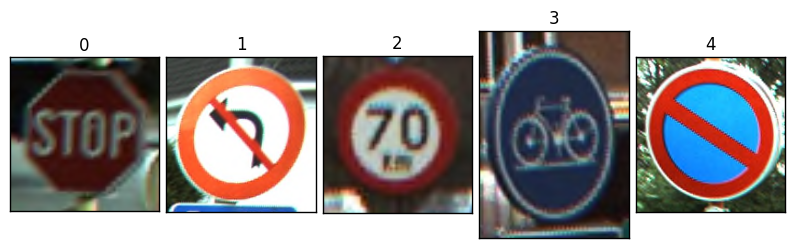

(5,)


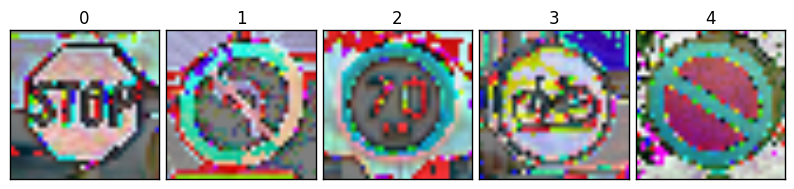

(32, 32, 3) -0.5 0.5
Test Accuracy = 0.200


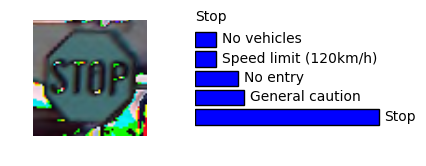

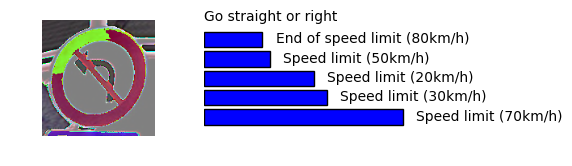

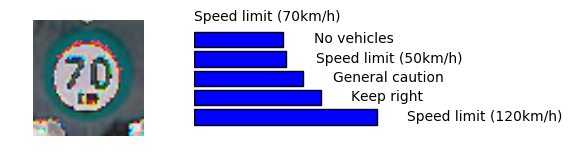

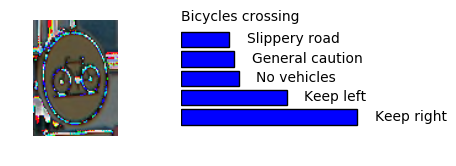

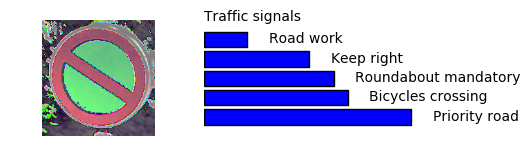

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### same to show_image_r() but not random
### to show all images in X 
### for new images set 1x5
def show_image(X, y):
    
    n_img = len(y)
    fig, axes = plt.subplots(1, n_img, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    print(axes.shape)
    for i in range(n_img):
        
        axes[i].imshow(X[i])
        axes[i].set_title(y[i])

    plt.show()

### load data
def load_data(data_dir):
    """
    Loads a data set and returns two lists:
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

# Load datasets.
ROOT_PATH = "D:\\xufq\\SD\\CarND-Traffic-Sign-Classifier-Project\\"
#train_data_dir = os.path.join(ROOT_PATH, "datasets/BelgiumTS/Training")
test_data_dir = os.path.join(ROOT_PATH, "Newimages\\")
### these 5 images are from http://btsd.ethz.ch/shareddata/
### labels has been updated according to signnames.csv

images, labels = load_data(test_data_dir)
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))
show_image(images,range(5))


ndata_images = []
for index in range(len(images)):
    image = images[index].squeeze()
    image32 = cv2.resize(image, (32, 32))
    #image32 = cv2.cvtColor(image32,cv2.COLOR_BGR2RGB)
    ndata_images.append(image32)
ndata = input_process(ndata_images)
#ndata = ndata_images
show_image(ndata,range(5))
print(ndata[0].shape, ndata[0].min(), ndata[0].max())

nlabel = [14,36,4,29,26]

top_k_operation = tf.nn.top_k(logits, 5)
    
### Evaluate the Model with new images 
with tf.Session() as sess:
    ### restore session
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    ### evaluate new images accuracy 
    test_accuracy = evaluate(ndata, nlabel)
    print("Test Accuracy = {:.3f}".format(test_accuracy))   
    
    ### print softmax and top_k
    top_k_output = sess.run(top_k_operation, feed_dict={x: ndata, y: nlabel, keep_prob : 1.}) 
    
    ### to show each images and their top 5 probabilities
    idx = np.arange(5)  
    n = 5
    width = 1.0 / (n + 1)
    for i in range(5):
        plt.figure(figsize=(5,1.5))
        gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
        plt.subplot(gs[0])
        plt.imshow(images[i]+.5)
        plt.axis('off')
        plt.subplot(gs[1])
 
        #"""
        plt.barh(np.arange(5),top_k_output.values[i], align='center')
        
        xpos = top_k_output.values[i] + 1
        ypos = range(5)
        
        for i_label in range(5):
            plt.text(xpos[i_label], ypos[i_label]-0.3, data_pd['SignName'][top_k_output.indices[i][i_label]], ha='left', va='bottom', rotation=0)  
        plt.axis('off');
        plt.text(0,5,data_pd['SignName'][nlabel[i]]);
        plt.show();
        #"""
        
    #print(top_k_output.indices)
    #print(top_k_output.values)       

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
"""
Five candidate images are shown above and taken from http://btsd.ethz.ch/shareddata/, which are labeled 0,1,2,3,4 seperately.
Candidate images 1, 3 angle are a little distorted, which are what I worry about whether can the model recognize well or not. 
Candidate image 4 is not included in German Traffic Sign Dataset, which means can not park here for long time and was considered as 
Traffic signals here.

Candiate image 0 "stop": 
Candiate image 1 "Go straight or right": 
Candiate image 2 "Speed limit (70km/h)": 
Candiate image 3 "Bicycles crossing": 
Candiate image 4 "Traffic signals": 
"""

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
"""
The performance on the new images is poor and about 20%, compared to the accuracy results of the test set about 95%.
Candiate image 0 "stop": OK and with high probabilities or certainty. 
Candiate image 1 "Go straight or right": NG
Candiate image 2 "Speed limit (70km/h)": NG. 
Candiate image 3 "Bicycles crossing": NG
Candiate image 4 "Traffic signals": NG

At first I think the reason for NG candidate image 1 and 3 is candiate image angle, then I trained the model with 
augmentation including images shear, etc.
But it seems not improvements the accuracy for new images. 
"""

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [ ]:
"""
The top five softmax probabilities of the predictions on the captured images are outputted and showed above. 

Candiate image 0 "stop": OK and with high probabilities or certainty. 
Candiate image 1 "Go straight or right": NG. relative high probalilities "Speed limit (70km/h)" 
Candiate image 2 "Speed limit (70km/h)": NG. relative high probalilities "Speed limit (120km/h)"
Candiate image 3 "Bicycles crossing": NG. relative high probalilities "Keep right"
Candiate image 4 "Traffic signals": NG. relative high probalilities for "Priority road" 

An obvious phenomenon is that if NG the probalilities will relative uniform distribute than OK. 
On the contrary, "Stop" is recognized succussfully with high probalilities. 

The top_k results will be variable with each calcuation. 
I have no idea for why new images set bad accuracy and how improve accuracy on new images set next step. 
"""

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.